In [24]:
from scipy.stats import gamma
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [26]:
'''
SVR for R3
'''
good_dist = [6.133305555556212e-05, 0.00019688777777776133, 0.00024810694444450887, 0.0003005169444444657, 0.00022932361111105632, 0.0005594441666667356, 0.00016447416666662273, 0.0003987161111110931, 0.000497506111111201, 0.0004091950000000206, 0.000543605833333221, 0.0001858763888888614, 0.0005946822222222107, 0.00035045638888891355, 0.0003070611111110743, 0.0006175722222222764, 0.00022301666666664152, 0.0007149788888889059, 0.0010669430555555952, 0.0011107650000000261, 0.0008816461111110763, 0.0005183983333332939, 0.00033137555555560203, 0.00042554027777778414, 0.001742865277777743, 0.0003703819444443733, 0.0001849747222223328, 0.0009564141666666564, 0.0004891911111111012, 0.0008788788888888677, 0.00017165777777773802, 1.871027777777725e-05, 0.00024817111111113553, 0.0002367822222222541, 0.0004886577777777109, 0.00021180416666671196, 0.00012323009849074084, 4.211044641735836e-05, 1.8912590215218006e-05, 7.896952504939079e-05, 3.506418811977463e-05, 4.246425311990818e-05, 4.370962977227515e-05, 8.811853165833082e-05, 7.02569111246207e-05, 2.1693862701723627e-05, 4.377313599787888e-05, 3.0077537299644084e-05, 3.753804005771197e-06, 1.8770528143380332e-05, 7.614913034981115e-06, 6.0365416364154873e-05, 8.029321457294215e-05, 9.29780054334109e-05, 0.00011106775093385152, 3.806386664039708e-05, 5.433102914045385e-05, 4.5551419660374605e-05, 9.697335559605524e-05, 6.015653072229929e-05, 0.0001292930569278444, 7.771070101701981e-05, 0.00014030146142952546, 0.0001337123281440395, 1.8660727924236283e-05, 3.7658197590525116e-05, 1.756776532962868e-05, 7.066948249826008e-06, 8.899837570728388e-05, 0.0001669429124926248, 2.9498771333595663e-05, 4.05995666109842e-05, 8.97167028210793e-05, 1.502323744535447e-05, 1.3881826567579882e-05]
bad_dist = [6.0949166666670504e-05, 0.00013488472222219626, 0.0001871405555555766, 0.0005382202777778232, 0.0007708699999999718, 0.0008487386111111131, 0.0002592822222221296, 0.00017302388888899584, 0.00013966166666663261, 0.00014351222222222645, 0.0005777413888889489, 0.00041512166666669457, 0.0007080727777777846, 0.005906143611111223, 0.0029035469444444483, 0.0038881963888889423, 0.002798426944444442, 0.008439460277777863, 0.007831909999999987, 0.01219931833333335, 0.007778884999999991, 0.011568985555555567, 0.009614803333333408, 0.010437710833333374, 0.015254296666666715, 0.018127735833333356, 0.020656573333333483, 0.02139504805555563, 0.021443270833333444, 0.02239220805555562, 0.02429196194444445, 0.024305167777777834, 0.027710839444444545, 0.02850373611111129, 0.029043766111111233, 0.02859496250000013, 0.03044430667608541, 0.03064448937951514, 0.032207805689833384, 0.033289795237846524, 0.032349048410250214, 0.034545663499055315, 0.03533837476613914, 0.03481251316488808, 0.03562180347937582, 0.038093732079467535, 0.03582253326340721, 0.0401801983385257, 0.03978012564456798, 0.03961998657343785, 0.04149261664186514, 0.04198757431572203, 0.0450073947762589, 0.04344706506350221, 0.04719527607025862, 0.04741527426798453, 0.04835538244229066, 0.04844099331634893, 0.04731019047496384, 0.04830053850900102, 0.05060485344585282, 0.05317697895529698, 0.05438527495687625, 0.0552930832776332, 0.05204708375680796, 0.058349269785558565, 0.053395026408201776, 0.059182065697467263, 0.05586874519268954, 0.061783737719192516, 0.059368715716443296, 0.06022699853244396, 0.06708160513717244, 0.06982511512216522, 0.06446664764969522]
print(len(good_dist))
print(len(bad_dist))

75
75


shape  0.6550648377860516
scale 0.0003918359100198963

shape  1.9303402122260147
scale 0.015173850651306376


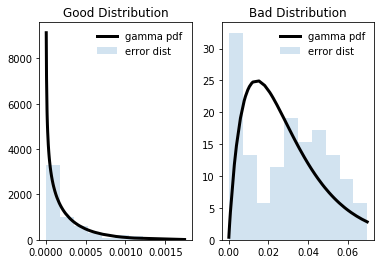

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

x = sorted(good_dist)
mean = np.mean(x)
var = np.var(x)

good_alpha = (mean**2)/var
good_scale = var/mean
print("shape ", good_alpha)
print("scale", good_scale)

ax1.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'k-', lw=3, label='gamma pdf')

ax1.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'error dist')
ax1.legend(loc='best', frameon=False)
ax1.ticklabel_format(style='plain')
ax1.set_title("Good Distribution")


x = sorted(bad_dist)
mean = np.mean(x)
var = np.var(x)

bad_alpha = (mean**2)/var
bad_scale = var/mean
print()
print("shape ", bad_alpha)
print("scale", bad_scale)


ax2.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'k-', lw=3, label='gamma pdf')

ax2.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'error dist')
ax2.legend(loc='best', frameon=False)
ax2.ticklabel_format(style='plain')
ax2.set_title("Bad Distribution")

plt.show()

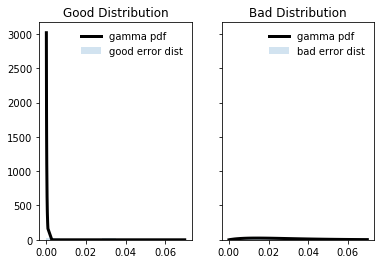

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

# x = sorted(good_dist)
# mean = np.mean(x)
# var = np.var(x)

# alpha = (mean**2)/var
# scale = var/mean

ax1.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'k-', lw=3, label='gamma pdf')

ax1.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'good error dist')
ax1.legend(loc='best', frameon=False)
ax1.ticklabel_format(style='plain')
ax1.set_title("Good Distribution")


# x = bad_dist
# mean = np.mean(x)
# var = np.var(x)

# alpha = (mean**2)/var
# scale = var/mean

ax2.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'k-', lw=3, label='gamma pdf')

ax2.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'bad error dist')
ax2.legend(loc='best', frameon=False)
ax2.ticklabel_format(style='plain')
ax2.set_title("Bad Distribution")

plt.show()

0.00396227510135503
174


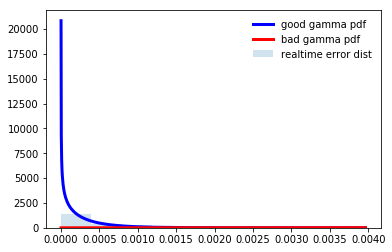

In [29]:
x = [7.720783753346704e-05, 8.523392469751118e-05, 0.00020809856927099732, 9.885472276356856e-05, 9.945505159731689e-05, 2.9809011086086583e-06, 0.00017568880418492074, 0.0003113221768448265, 0.00017197368527198712, 0.0007902525699785821, 0.0005853778118291965, 0.0008787800803294232, 0.0009600114432737304, 0.0008110563498641778, 0.0009947048648449928, 0.0007807440129037042, 0.0016658204441871315, 0.0016866254406614975, 0.001842311410358741, 0.0020741918662386455, 7.252693768227997e-05, 4.025793407964076e-05, 3.6544194610571806e-05, 0.0001795698231858433, 0.00013164883080137718, 3.683711503739076e-05, 0.0005608158083551427, 0.00011289137122153984, 0.0005957938166656627, 0.0004499578108517921, 0.0006186511045017736, 0.0006436029192155464, 0.0011308226195685886, 0.0015594821538551457, 0.0015432648170468142, 0.0025880248363308496, 0.00018643267965834647, 0.00022203715688479472, 2.9225683537710285e-05, 0.0003869928263048588, 2.5425905300033216e-05, 0.0005471795138395236, 0.0003795768169010743, 0.0004984011754299327, 0.00187910777398616, 0.0015194150730929723, 0.0010564833289830378, 0.0015937127686062058, 0.001743474721308539, 0.0009967490336833546, 0.002220804157496117, 3.0158561651562896e-05, 0.0002803714689731002, 2.3046518030804325e-05, 0.00011605824654520064, 8.045063645968945e-05, 0.0005250352241915135, 0.00037974914116793235, 0.0005813091976941845, 0.0015007371135746077, 0.0007545862842686983, 0.0015479497028433153, 0.0019823179308515, 0.0012012771938047513, 0.0019031238502577534, 0.002532321771335298, 2.1437237709010263e-05, 2.6328999155660656e-05, 0.00011643440989819989, 0.00019963725972344483, 0.00025946434696081657, 0.00023403308323081848, 0.0003117437447815212, 0.00037082285265168714, 0.0003110714884636405, 0.0003370541915677385, 0.0003532125661872939, 0.00028285251980820396, 0.0003847819034940076, 0.00035672961684342147, 0.0002500294327241496, 0.00021365846257543562, 0.00018329943907850592, 0.00024019366379840362, 0.00018313229473045846, 0.0001712235857434612, 0.00015506811290522883, 0.00011835805656005016, 0.00012005528668181487, 0.00011411568056342415, 0.00013500914364250358, 9.704723657876964e-05, 2.4180402905981987e-05, 4.506620982013874e-05, 5.1175097510052425e-05, 1.0649338917377994e-05, 1.297415600651914e-05, 1.7113821312308836e-05, 9.151237912541014e-06, 3.665178303539115e-06, 5.402423508703377e-06, 3.3524499105688473e-06, 2.356064503461035e-05, 2.301594900103052e-05, 1.50171053176808e-05, 8.601960986850867e-06, 6.052941603483182e-05, 4.173306381337081e-05, 4.7192244035156007e-05, 4.112226952478426e-05, 0.00022072487257719737, 0.0002953710022833935, 0.00011774517322893748, 0.0005501377554270378, 0.0006402600538955952, 0.0007341752902515721, 0.00044583140615688953, 0.0007432934403397308, 0.0010041106875006579, 0.0008488671429983806, 0.0020168445393307214, 0.0017010291484797204, 0.0019235989492517591, 0.00396227510135503, 0.00018344606189730177, 0.00033879244527600875, 8.836454743517321e-05, 0.0001684119672898238, 8.452390513324069e-05, 0.00040270086551702565, 0.0008053762709597579, 0.0007546134862158727, 0.001553542286410523, 0.0004371283298094078, 0.0021479418638633997, 5.0744909985625183e-05, 0.0002072744523776293, 0.00018504022068591489, 0.00016756672987690844, 0.0006783615440525612, 0.0007103816857645705, 0.0008318518398408915, 0.0010318837337835586, 0.0008934986172166447, 0.001721778711133496, 0.00206045068534775, 3.526669197309335e-07, 0.0003346804952801015, 5.9106071099724916e-05, 4.6480442000986595e-05, 0.0004936201716026778, 0.00046450191221715227, 8.647906949737648e-05, 0.0010680942836737758, 0.0003437937383906917, 0.000660155862151805, 0.0010210175078560692, 0.0008859990604619085, 0.001996309794048586, 0.0016390727077333473, 0.003134582574943435, 0.0001890782243328474, 0.00020042303429593407, 9.021945550877414e-05, 0.0006240002823793512, 0.0001828492689095446, 0.0002382566541163719, 0.0008039720366580201, 0.000658643930777244, 0.0011674655017043373, 0.0008369774315389733, 0.0014730279163380597, 0.001976297677846992, 0.0022380851606704235]
print(max(x))
print(len(x))
x = sorted(x)

fig, ax = plt.subplots()

ax.plot(x, gamma.pdf(x,good_alpha, scale=good_scale), 'b-', lw=3, label='good gamma pdf')
ax.plot(x, gamma.pdf(x,bad_alpha, scale=bad_scale), 'r-', lw=3, label='bad gamma pdf')

ax.hist(x, density=True, histtype='stepfilled', alpha=0.2, label = 'realtime error dist')
ax.legend(loc='best', frameon=False)
ax.ticklabel_format(style='plain')

plt.show()

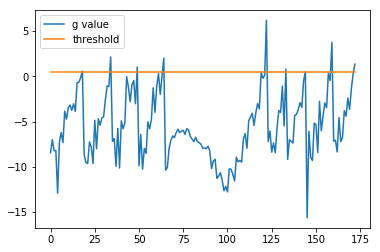

In [30]:
g_values = [-8.445199336979307, -7.001408476819357, -8.222273639694517, -8.213059989284531, -12.92591573083132, -7.297886218985255, -6.231073496783566, -7.334378899906071, -3.852413541719784, -4.744474199566653, -3.49690631844976, -3.1822022797640983, -3.7675535365249004, -3.050674599950355, -3.891491141508496, -0.7245901682880742, -0.6570363742585954, -0.15737648401733395, 0.5703061260183233, -8.682673618197724, -9.513592409817175, -9.646252683822109, -7.260372712069049, -7.7753919850287545, -9.635343193872437, -4.860204516121861, -8.018051599507423, -4.6960858002432815, -5.416683091441229, -4.591248287403886, -4.478788437066655, -2.5487006893716853, -1.0730891198163022, -1.1267396901720872, 2.1300386156528646, -7.195479785552385, -6.884074778256707, -9.94943931715518, -5.765470534796695, -10.13650579460246, -4.925498543097142, -5.808583624520502, -5.165845062226758, -0.04067392296874317, -1.205896672416074, -2.8202401608566134, -0.9602959625556409, -0.47342268948492006, -3.042974350073507, 1.0219099663626068, -9.907049637969765, -6.441560511483358, -10.267722110870466, -7.974896198122451, -8.530745962585499, -5.033236995032844, -5.807576362849829, -4.763484160152764, -1.2681074883932624, -3.9999825636477837, -1.1112267068315376, 0.2841143725442663, -2.0123455466352453, 0.03522998295805735, 1.9990324807316426, -10.364034152495485, -10.08975034732116, -7.969834298530419, -7.075381341371038, -6.5923683665352755, -6.787148560802905, -6.228299691362487, -5.860103007502552, -6.232724068284426, -6.065822410455624, -5.965933231519131, -6.4241566866282085, -5.778273947777507, -5.944553668634839, -6.663062358466263, -6.9539604743215335, -7.224884389403854, -6.738696676694033, -7.2264633508488885, -7.3418183356172335, -7.508370982580402, -7.944154712623117, -7.921777774338324, -8.001251807741113, -7.734894941997766, -8.250300668336678, -10.203654377211024, -9.357754390891103, -9.180453173558078, -11.283077917578055, -11.025480122128272, -10.662029933577003, -11.480145260167689, -12.660677120119146, -12.16158856893702, -12.775190806896887, -10.238307443572694, -10.269490766335593, -10.83391678084007, -11.56044908680002, -8.943107927956476, -9.464032128911185, -9.293682535264566, -9.484353208966525, -6.89489685633788, -6.337805609472184, -7.952299259940332, -4.911267795565095, -4.493740447172058, -4.08569845497891, -5.438691157934784, -4.047288198596391, -3.0152877661683988, -3.615440758706029, 0.3919745626800477, -0.2184069611677728, 0.09978188220185302, 6.189631700684572, -7.223500161717136, -6.054940847658499, -8.39141517325696, -7.369923349300263, -8.457632430089149, -5.67567695061469, -3.790637837496611, -3.9998689632042286, -1.092723368609299, -5.48546947157557, 0.7982185295417565, -9.192288217236975, -7.008517787179644, -7.208502432217138, -7.378441320633939, -4.325294533054972, -4.186868240294835, -3.683566173800415, -2.9114445322346967, -3.4391308313455653, -0.5433322530046638, 0.5276663971378, -15.654470303692179, -6.080736731537362, -8.976992847823503, -9.314833760699393, -5.190023890124188, -5.3399548831037436, -8.423608507643046, -2.777434105214141, -6.023818542933739, -4.405250387536853, -2.951960453528727, -3.4685252878112323, 0.32787044670971, -0.48386257755805673, 3.7332268247403846, -7.17093306460059, -7.06841811361921, -8.360310631572073, -4.566969943837236, -7.229139432493181, -6.753838422919767, -3.79635450451147, -4.411933397263532, -2.416931382864419, -3.6629892912418356, -1.3607641261589833, 0.2652680303068209, 1.3400268216461768]
threshold = [0.5 for x in range(len(g_values))]
plt.plot(g_values, label="g value")
plt.plot(threshold, label="threshold")
plt.legend()
plt.show()